<a href="https://colab.research.google.com/github/basmala-kamal/tut-pricing-model/blob/main/high_low_volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install requests beautifulsoup4


In [4]:
import requests
from bs4 import BeautifulSoup


In [24]:
import json
import pandas as pd
import re

# 1. Load the JSON file
with open("body+splash.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to a pandas DataFrame for easier data manipulation
df = pd.DataFrame(data)
df = df.dropna(subset=["price", "rating"])
import time


# Define the function to scrape the brand name
def scrape_brand_name(session, url):
    try:
        if not url or not url.startswith("http"):  # Validate URL
            return None

        # Send a GET request to the URL using the session
        response = session.get(url, timeout=10)
        response.raise_for_status()  # Raise an error for HTTP issues

        # Parse the page content with BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # Adjust this selector based on the actual structure of the webpage
        brand_tag = soup.find("tr", class_="a-spacing-small po-brand")
        if brand_tag:
            td_tag = brand_tag.find("td", class_="a-span9")
            if td_tag:
                span_tag = td_tag.find("span", class_="a-size-base po-break-word")
                if span_tag:
                    return span_tag.get_text(strip=True)

        # Return None if the brand name is not found
        return None

    except requests.exceptions.RequestException as e:
        print(f"Network error scraping {url}: {e}")
        return None
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return None

# Load the JSON file


# Ensure the 'link' column exists and is valid
if "link" in df.columns:
    # Create a requests session
    with requests.Session() as session:
        # Set a User-Agent header to mimic a browser (optional but recommended)
        session.headers.update({
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
        })

        # Apply the scraping function to the 'link' column
        brand_names = []
        for idx, url in enumerate(df["link"]):
            print(f"Scraping {idx + 1}/{len(df)}: {url}")
            brand_name = scrape_brand_name(session, url)
            brand_names.append(brand_name)

            # Throttle requests to avoid getting blocked
            time.sleep(2)

        # Add the scraped brand names to the DataFrame
        df["brand_name"] = brand_names


def clean_price(price_str):
    if price_str is None:
        return None
    numeric_str = re.sub(r"[^\d\.]", "", price_str)
    try:
        return float(numeric_str)
    except ValueError:
        return None

df["price_numeric"] = df["price"].apply(clean_price)


def clean_rating(rating_str):
    if rating_str is None:
        return None


    match = re.search(r"\d+(\.\d+)?", rating_str)
    if match:
        try:
            return float(match.group(0))
        except ValueError:
            return None
    return None


df["rating_numeric"] = df["rating"].apply(clean_rating)


def extract_volume(title_str):
    match = re.search(r'(\d+(?:\.\d+)?)\s*مل', title_str)
    if match:
        return float(match.group(1))
    return None

df["volume"] = df["title"].apply(extract_volume)

# ------------------------------------------------------------------------------
# Final cleaned DataFrame
print(df)


Scraping 1/241: https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A7%D8%B2%D8%A7%D9%86%D9%88%D9%81%D8%A7-%D8%A8%D9%84%D9%88-%D9%81%D8%A7%D9%86%D9%8A%D9%84%D8%A7-%D9%81%D8%B1%D9%86%D8%B3%D9%8A%D9%87/dp/B083B1CDNC
Scraping 2/241: https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A7%D8%B2%D8%A7%D9%86%D9%88%D9%81%D8%A7-%D8%A8%D9%84%D9%88-%D9%81%D8%A7%D9%86%D9%8A%D9%84%D8%A7-%D9%81%D8%B1%D9%86%D8%B3%D9%8A%D9%87/dp/B083B1CDNC
Scraping 3/241: https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A7%D8%B2%D8%A7%D9%86%D9%88%D9%81%D8%A7-%D8%A8%D9%84%D9%88-%D9%81%D8%A7%D9%86%D9%8A%D9%84%D8%A7-%D9%81%D8%B1%D9%86%D8%B3%D9%8A%D9%87/dp/B083B1CDNC
Scraping 4/241: https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A7%D8%B2%D8%A7%D9%86%D9%88%D9%81%D8%A7-%D8%A8%D9%84%D9%88-%D9%81%D8%A7%D9%86%D9%8A%D9%84%D8%A7-%D9%81%D8%B1%D9%86%D8%B3%D9%8A%D9%87/dp/B083B1CDNC
Scraping 5/241: https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A7%D8%B2%D8%A7%D9%86%D9%88%D9%81%D8%A7-%D8%A8%D9%84%D9%88-%D9%81%D8%A7%D9%86%D9%8A%D9%84%D8%A7-%D9%81%D8%B1%D9%

In [25]:
df

,title,price,rating,link,brand_name,price_numeric,rating_numeric,volume
0,جي .كازانوفا بلو بخاخ معطر للجسم برئحة فانيلا ...,‏21.00 ريال,4.2 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,None,21.00,4.2,235.0
1,سبلاش للجسم للرجال من بيور بيوتي 250 مل ماجيستيك,‏23.20 ريال,4.1 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,None,23.20,4.1,250.0
3,بودي سبلاش كاسانوفا، للجنسين، 235.0 ملليلتر,‏22.50 ريال,5.0 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,None,22.50,5.0,235.0
5,سبراي معطر للجسم من بودي فانتاسيز سيجنتشر - زه...,‏42.95 ريال,4.3 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,None,42.95,4.3,236.0
6,"جي .كازانوفا بلو بخاخ معطر للجسم برئحة تيزمي ,...",‏21.00 ريال,4.7 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,None,21.00,4.7,235.0
...,...,...,...,...,...,...,...,...
298,مزيل عرق ستيك كابتن رجالي من اولد سبايس لانتعا...,‏17.50 ريال,4.1 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,كوول اند كوول,17.50,4.1,50.0
299,عطر روز اوريجينال رول اون بدون كحول 9 مل، للجنسين,‏69.81 ريال,4.1 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,كوول اند كوول,69.81,4.1,9.0
303,ليرير سبلاش للجسم ماندرين تويست من ووتاجيرل، 1...,‏189.25 ريال,4.0 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,كوول اند كوول,189.25,4.0,135.0
304,ارماف بخاخ الجسم انشانتد رومانس للنساء 200 مل ...,‏99.00 ريال,3.9 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,كوول اند كوول,99.00,3.9,200.0


In [32]:
zero_or_negative = df[df["volume"] <= 0.0]
zero_or_negative

,title,price,rating,link,brand_name,price_numeric,rating_numeric,volume


In [34]:
df_cleaned = (
    df[["title", "price_numeric", "rating_numeric", "volume"]]
    .dropna(subset=["title", "price_numeric", "rating_numeric","volume"])
)

df_cleaned.shape
df_cleaned.to_csv("bodysplashcleaned", index=False)

<Axes: xlabel='volume', ylabel='price_numeric'>

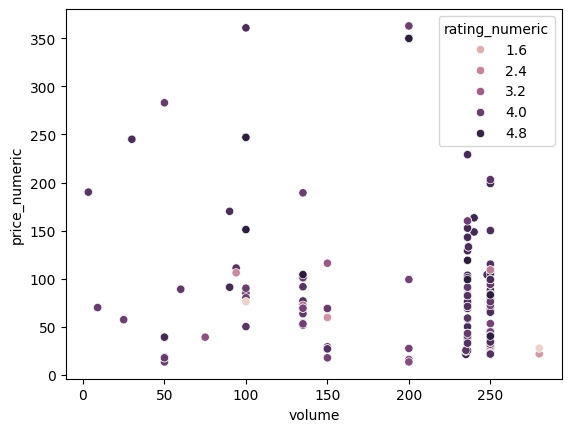

In [27]:
import seaborn as sns

sns.scatterplot(data = df_cleaned, x = 'volume', y = 'price_numeric', hue = 'rating_numeric')

In [28]:

import seaborn as sns
import matplotlib.pyplot as plt

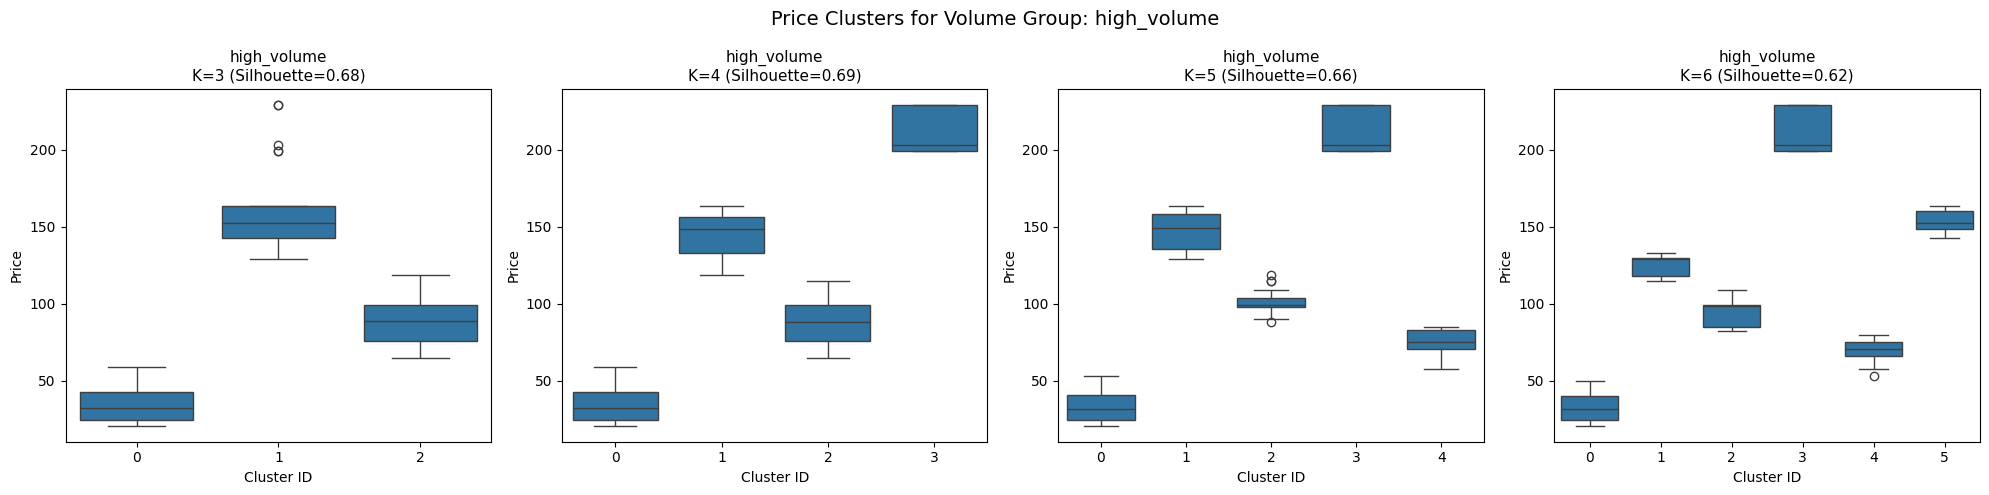

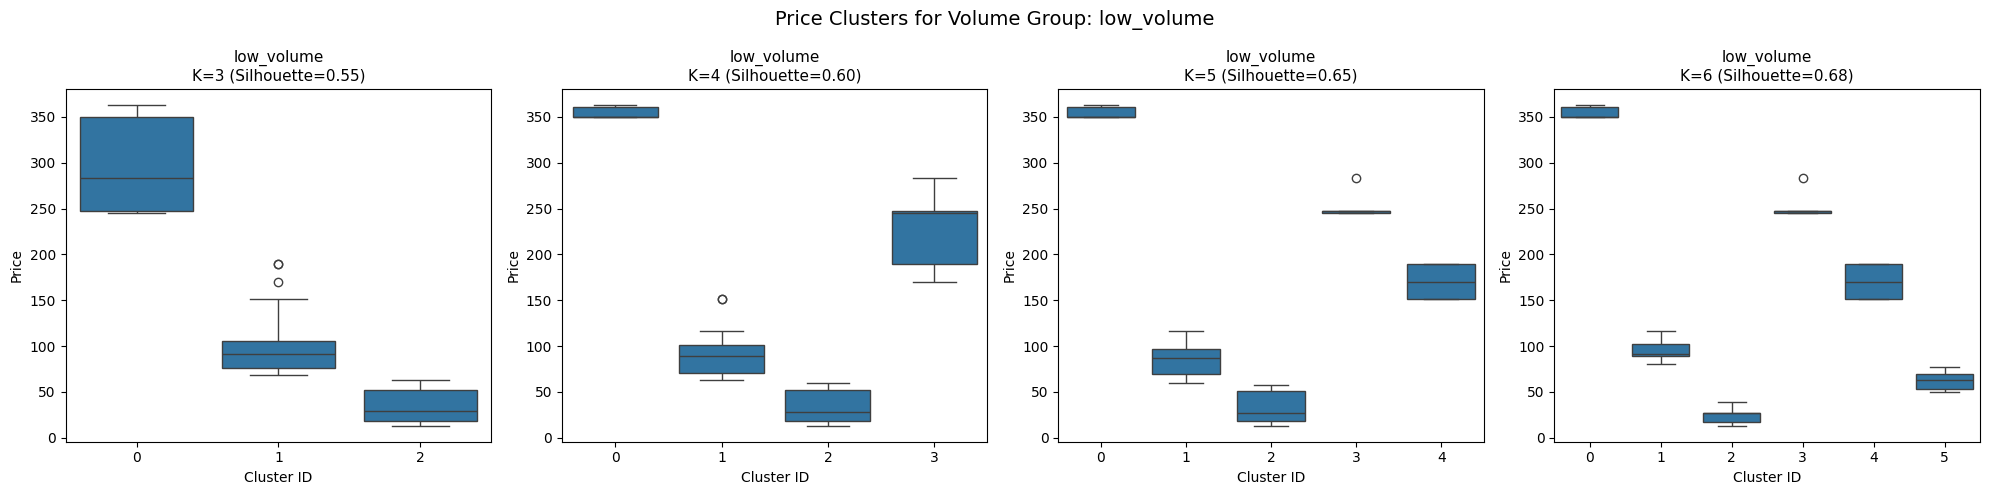

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1) Create two volume groups
df_cleaned["volume_group"] = pd.cut(
    df_cleaned["volume"],
    bins=[0, 200, float('inf')],   # Example split at volume=0.5
    labels=["low_volume", "high_volume"]
)


for group_name in df_cleaned["volume_group"].unique():
    subset = df_cleaned[df_cleaned["volume_group"] == group_name].copy()

    # 2) Scale ONLY price_numeric
    X_price = subset[["price_numeric"]].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_price)

    # Make a figure with 4 subplots: one for each k
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

    for idx, k in enumerate([3, 4, 5, 6]):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
        kmeans.fit(X_scaled)

        # Store cluster labels
        cluster_col = f"cluster_k{k}"
        subset[cluster_col] = kmeans.labels_

        # Optional: compute silhouette score for reference
        sil_score = silhouette_score(X_scaled, kmeans.labels_) if len(subset) > k else np.nan

        # 3) Visualize via boxplot: x=cluster, y=raw price
        #    (We use the *raw* "price_numeric" from subset, but group by the cluster labels.)
        sns.boxplot(
            x=cluster_col,
            y="price_numeric",
            data=subset,
            ax=axes[idx]
        )
        axes[idx].set_title(
            f"{group_name}\nK={k} (Silhouette={sil_score:.2f})",
            fontsize=11
        )
        axes[idx].set_xlabel("Cluster ID")
        axes[idx].set_ylabel("Price")

    plt.suptitle(f"Price Clusters for Volume Group: {group_name}", fontsize=14)
    plt.tight_layout()
    plt.show()